In [1]:
%matplotlib inline

In [50]:
import xlrd
import os 
import sqlite3
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import norm

sns.set(style="whitegrid")

In [51]:
db_path = '../datawarehouse.db'

### Target Variable: Price of AirBnB Listing

In [8]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT id, CAST(REPLACE(price, '$', '') AS FLOAT) as avg_price
FROM listings;
'''

cur.execute(query)
con.commit()

price_arr = cur.fetchall()

con.close()

In [9]:
cost_arr = []
for pairs in price_arr:
    cost_arr.append(pairs[1])

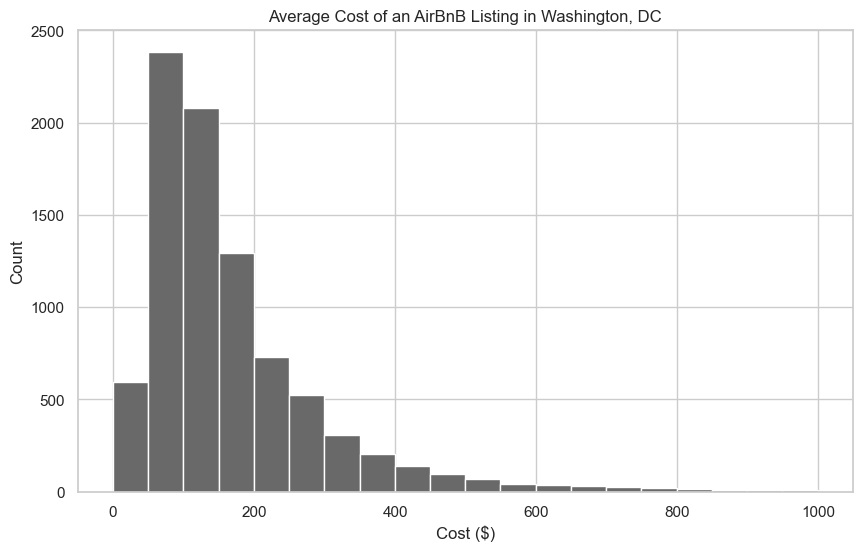

In [ ]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist(cost_arr, color="dimgray", bins=20)
axes.set_ylabel( "Count")
axes.set_xlabel( "Cost ($)")
axes.set_title( "Average Cost of an AirBnB Listing in Washington, DC")

plt.show()
plt.close()

Variables to explore:
- bedrooms
- beds
- accommodates

### Bedrooms variable

In [32]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT id, CAST(bedrooms AS INT), CAST(beds AS INT), CAST(accommodates AS INT), CAST(REPLACE(price, '$', '') AS FLOAT)
FROM listings;'''

cur.execute(query)
con.commit()

b_arr = cur.fetchall()

In [33]:
b_arr[0]

(22229408, 1, 1, 2, 20.0)

The SQL query returns a list of tuple objects, with:
- `b_arr[0]`: listing_id
- `b_arr[1]`: bedrooms
- `b_arr[2]`: beds
- `b_arr[3]`: accommodates
- `b_arr[4]`: price

In [34]:
listing_id = []
bedrooms = []
beds = []
accommodates = []
price = []
for b in b_arr:
    listing_id.append(b[0])
    bedrooms.append(b[1])
    beds.append(b[2])
    accommodates.append(b[3])
    price.append(b[4])
    
b_df = pd.DataFrame({'listing_id': listing_id,
                    'bedrooms': bedrooms,
                    'beds': beds,
                    'accommodates': accommodates,
                    'price': price})

b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   listing_id    8628 non-null   int64  
 1   bedrooms      8628 non-null   int64  
 2   beds          8628 non-null   int64  
 3   accommodates  8628 non-null   int64  
 4   price         8628 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 337.2 KB


The variables `beds`, `bedrooms`, and `accommodates` are all integer values. The `price` variable is a float value. 

In [53]:
def freeman_diaconis( data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

### Bedrooms
The bedrooms variable is a numerical integer value. The `beds` variable represents the number of beds in the AirBnb. More beds generally corresponds to a higher capacity for overnight guests.

In [38]:
b_df.bedrooms.describe()

count    8628.000000
mean        1.516574
std         1.134750
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: bedrooms, dtype: float64

75% of AirBnB listings in the DC area contain two or fewer bedrooms. There is one AirBnB that has a maximum number of bedrooms of 15. 

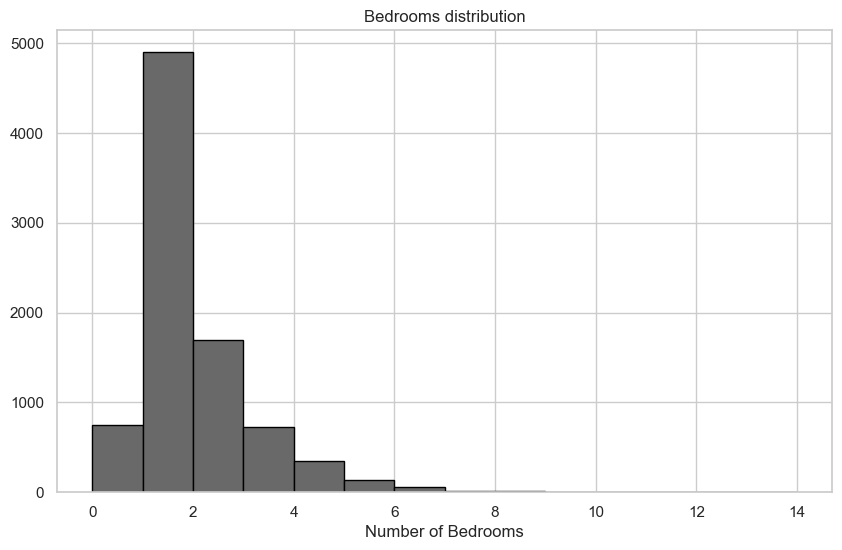

In [60]:
h=1
mn = int(b_df["bedrooms"].min())
mx = int(b_df["bedrooms"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(b_df["bedrooms"],bins=bins, histtype='bar', color="DimGray", ec='black')
axes.set_title("Bedrooms distribution")
axes.set_xlabel("Number of Bedrooms")

plt.show()
plt.close()

The distribution of the number of bedrooms appears to be right-skewed. This makes sense, as one or two bedrooms may be common for most homes, with 3 or more bedrooms being less commons in homes, especially in a densely-populated area.

### Beds
The bedrooms variable is a numerical integer value. The `beds` variable represents the number of beds in the AirBnb. More beds generally corresponds to a higher capacity for overnight guests.

In [61]:
b_df.beds.describe()

count    8628.000000
mean        1.930111
std         1.405451
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        20.000000
Name: beds, dtype: float64

75% of AirBnB listings in the DC area contain two or fewer beds. There is one AirBnB that has a maximum number of bedrooms of 20. 

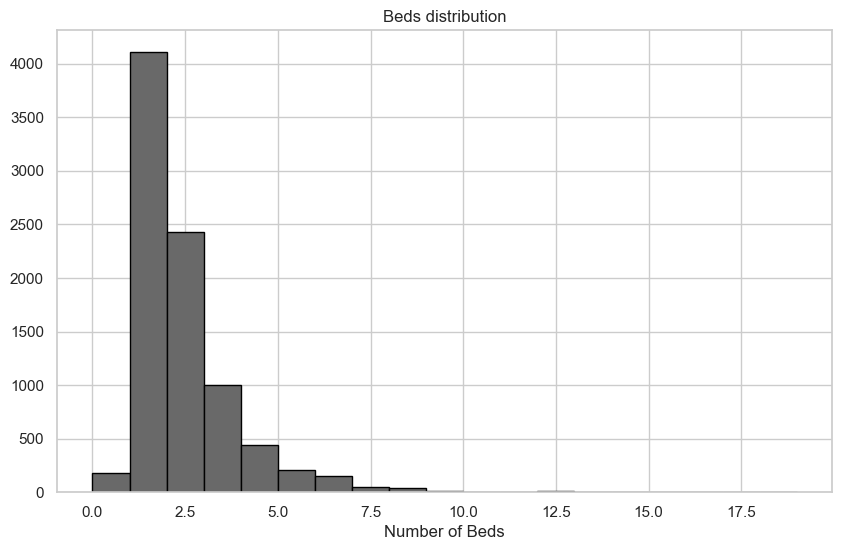

In [62]:
h=1
mn = int(b_df["beds"].min())
mx = int(b_df["beds"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(b_df["beds"],bins=bins, histtype='bar', color="DimGray", ec='black')
axes.set_title("Beds distribution")
axes.set_xlabel("Number of Beds")

plt.show()
plt.close()

The distribution of the number of bedrooms appears to be right-skewed, following a similar shape to the number of bedrooms in the AirBnBs. There are a few properties with no beds, but most of the properties have 1, 2, or 3 beds.

### Accommodates
The `accommodates` variable is a numerical integer value. The `accommodates` variable represents the number of beds in the AirBnb. More beds generally corresponds to a higher capacity for overnight guests.

In [64]:
b_df.accommodates.describe()

count    8628.000000
mean        3.632592
std         2.389346
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: accommodates, dtype: float64

75% of AirBnB listings in the DC area are capable of accomodating 4 people. This unsurprisingly folows a similar pattern to both the `beds` and `bedroom` variables.

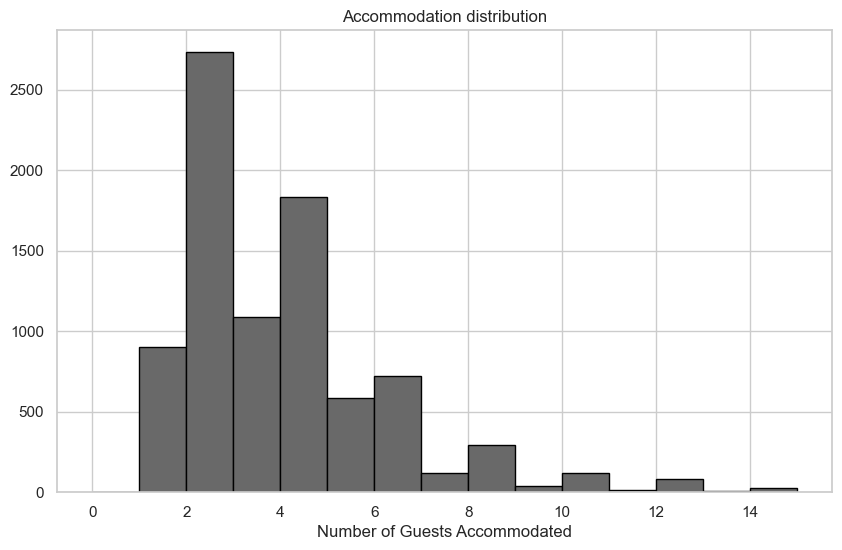

In [65]:
h=1
mn = int(b_df["accommodates"].min())
mx = int(b_df["accommodates"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(b_df["accommodates"],bins=bins, histtype='bar', color="DimGray", ec='black')
axes.set_title("Accommodation distribution")
axes.set_xlabel("Number of Guests Accommodated")

plt.show()
plt.close()

The data are once again right-skewed. Even number `accommodates` values are more common, which makes sense given that one bed is often counted as accommodating 2 guests.

# Pairwise Analysis

In [66]:
def classify_correlation(r):
    r = abs(r)
    if r < 0.16:
        return "very weak"
    if r < 0.29:
        return "weak"
    if r < 0.49:
        return "low"
    if r < 0.69:
        return "moderate"
    if r < 0.89:
        return "strong"
    return "very strong"

In [67]:
def correlation(data, x, y):
    print("Correlation coefficients:")
    r = stats.pearsonr(data[x], data[y])[0]
    print( "r   =", r, f"({classify_correlation(r)})")
    rho = stats.spearmanr(data[x], data[y])[0]
    print( "rho =", rho, f"({classify_correlation(rho)})")

In [68]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [69]:
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):

    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs( 0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="DimGray", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")

    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOWESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)

    plt.show()
    plt.close()

/opt/anaconda3/envs/en685648/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


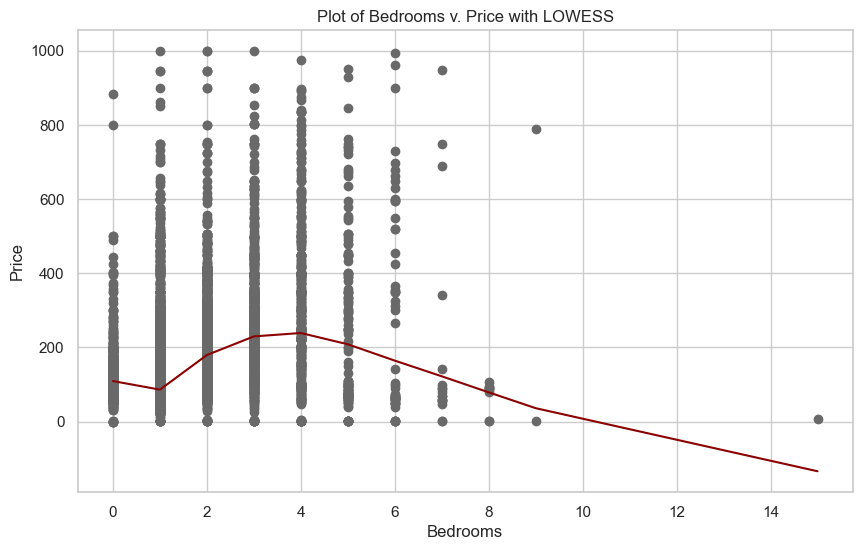

In [70]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(b_df["price"], b_df["bedrooms"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( b_df[ "bedrooms"], b_df["price"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of Bedrooms v. Price with LOWESS")
axes.set_xlabel( "Bedrooms")
axes.set_ylabel( "Price")

plt.show()
plt.close()

In [52]:
correlation(b_df, 'bedrooms', 'price')

Correlation coefficients:
r   = 0.39195580522733553 (low)
rho = 0.41556405657148726 (low)


### Beds v. Price with LOWESS

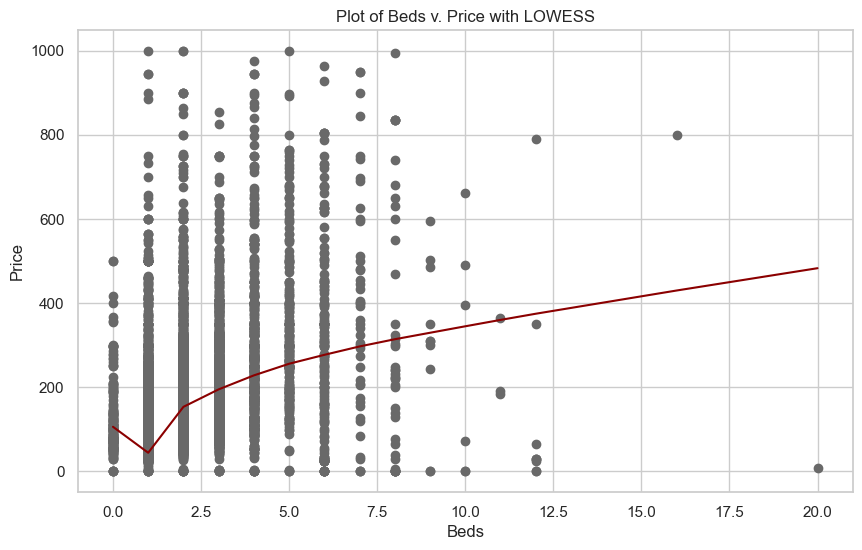

In [71]:
lowess = sm.nonparametric.lowess(b_df["price"], b_df["beds"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( b_df[ "beds"], b_df["price"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of Beds v. Price with LOWESS")
axes.set_xlabel( "Beds")
axes.set_ylabel( "Price")

plt.show()
plt.close()

In [72]:
correlation(b_df, 'beds', 'price')

Correlation coefficients:
r   = 0.4218706196242424 (low)
rho = 0.45671345442335864 (low)


### Accommodates v. Price with LOWESS

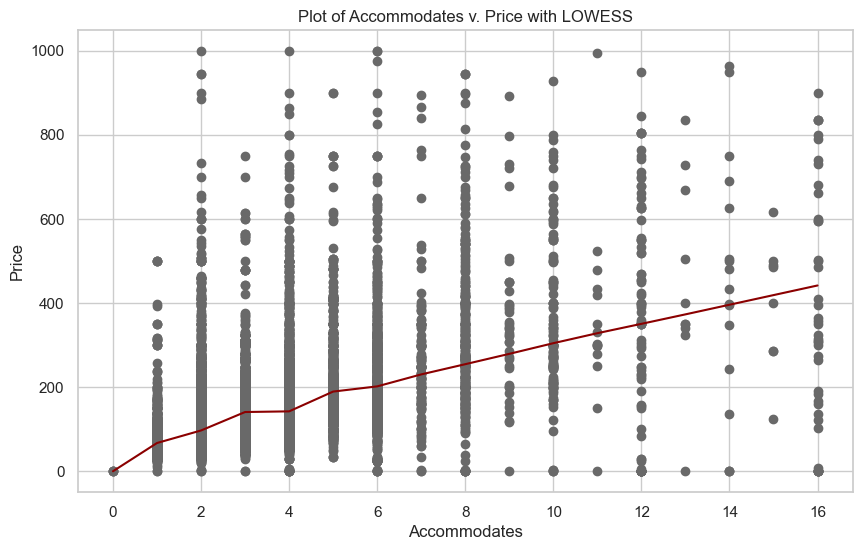

In [74]:
lowess = sm.nonparametric.lowess(b_df["price"], b_df["accommodates"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( b_df[ "accommodates"], b_df["price"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of Accommodates v. Price with LOWESS")
axes.set_xlabel( "Accommodates")
axes.set_ylabel( "Price")

plt.show()
plt.close()

In [75]:
correlation(b_df, 'accommodates', 'price')

Correlation coefficients:
r   = 0.5080500299054234 (moderate)
rho = 0.5535062939394848 (moderate)
